# Part II - (Insights Explanation On GoBike Data)
## by (Kitwana Shebabetsi execheil)

## Investigation Overview

In this investigation, I entend to understand the relationship between the starting day, hour and different gendersa and user type . I also want to understand what is in the ride duration compared to the type of user. Then i will eventually see the ride duration based on the whole member characteristics.


## Dataset Overview

My dataset contains the information about bike-sharing system from San Francisco Bay area. It is only for the year 2017, month of Frebruary. As the data scource constantly updates, what i found was on for february month. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_gobike = pd.read_csv('clean_gobike.csv')
df_gobike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_day,start_hour,member_age,member_age_intv
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,Thursday,17,33,30
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,Thursday,12,45,40
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,Thursday,17,28,20


In [3]:
# set a sefault color
base_color = sb.color_palette()[0]

order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_hour = np.arange(0, 24)

# create two variabels for member start time
member_start_hour = df_gobike.groupby(['start_hour', 'user_type']).size().reset_index()
member_start_day = df_gobike.groupby(['start_day', 'member_gender']).size().reset_index()


## The relationship between Start riding day and the member gender

The `Male gender` has got more number of bike trips than `Female` and `Other`. With the `Other` gender having almost none ride. The largest bike trip was for Male gender and it is at 25000 On thursday. In all cases, no matter the gender, Tuesday to Thursday are the days of the week with plenty of rides than other day. Showing again, weekends with the least number of rides

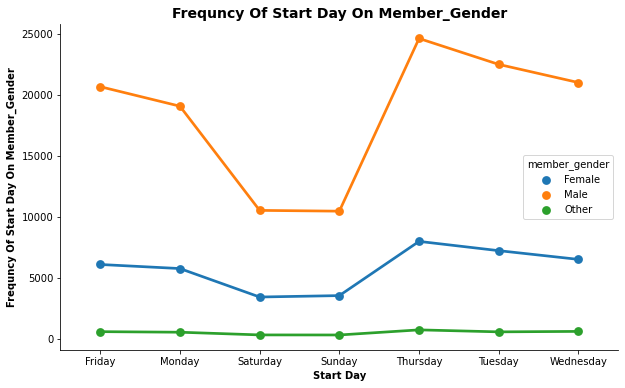

In [22]:
def thePointplot(df, var_x, var_y, var_hue, order = None, palette = None, dodge = None):
    """The function to plot pointplot graphs with their specific categories

        Args:
             df : the given dataframe
             var_x : what is to be found on the x axis
             var_y : what is to be found on the ya axis
             var_hue: the given hue variabel

        Return: The pointplot
    """
    # Set the graph dimenssion
    plt.figure(figsize= [10, 6])
    # plot
    sb.pointplot(data = df, x = var_x, y = var_y, hue = var_hue)
    # Replace the _ with a space
    var_x = var_x.replace("_", " ")
    if var_y == 0:
        title = f"Frequncy of {var_x} on {var_hue}"
    else:
        var_y = var_y.replace("_", " ") # replace _ with a space
        title = f"Average of {var_y} by {var_x} and {var_hue}"
    var_hue = var_hue.replace("_", " ")
    # add title and format it
    plt.title(f'''{title}'''.title(), fontsize = 14, weight ='bold')
    # add x lable and format it
    plt.xlabel(var_x.title(), fontsize = 10, weight = "bold")
    # add y label and format it
    plt.ylabel(f'''{title.split(' by')[0]}'''.title(), weight = "bold")
    # despline
    sb.despine()

#  call the function for the member_gender plot
thePointplot(member_start_day, 'start_day', 0, 'member_gender', order = order_day)


## The realationship between stard riding hour and User type
As we can see, the `Subscriber` and  `Customer` have amost the same hour time from  Midnight to 5 AM, at that time there is almost no ride. Then both Subscriber and customer raise up during the day time with Suscriber having more rides. Between __(8 AM and 9 AM)__ and __(5 PM and 6 PM)__ there are two peaks showing a lot of rides respectively. It explain the fact that it is the most active time for workers for the coming and going.


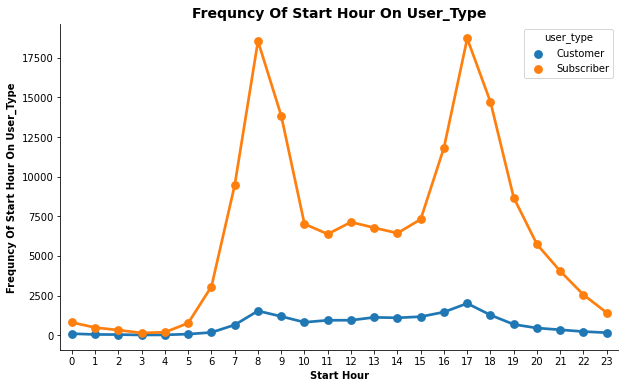

In [18]:
# Call the function for the user type
thePointplot(member_start_hour, 'start_hour', 0, 'user_type', order = order_hour)

## The average duration for the day of the week based on the type of users
In average, Every day of the week, the `Customer` rides longer compared to the `Subsicriber`. On weeekends, people rides longer than when it is weekdays. Friday, monday and Tuesday, people don't ride much longer compared to other days of the week.

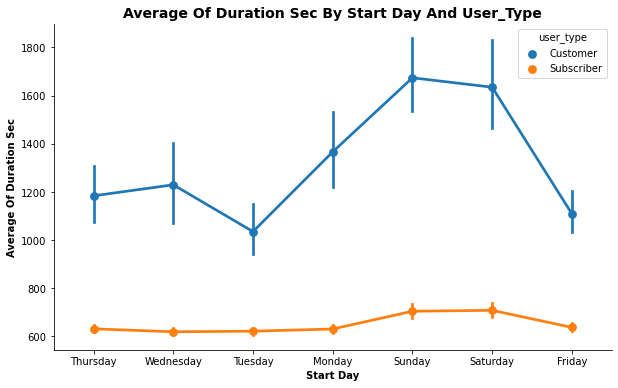

In [20]:
# Call the function to plot this
thePointplot(df_gobike, 'start_day', 'duration_sec', 'user_type', dodge = 0.4, order = order_day)

## Relationship between the member characterisitcs and Duration
The graph shows here that in the inverval of 20 and 30 years, we find most people who rides longer than other interval of ages. between `20000` and `60000 seconds`, Male and female have the most number of durations in ride. All genders have the record of longest duration of at least `80k seconds`. Finally, another interesting obervation is that we find a big number of ride duration is too short (say, less than `100 seconds`), this means, many people who rent the bike do usually go too far.

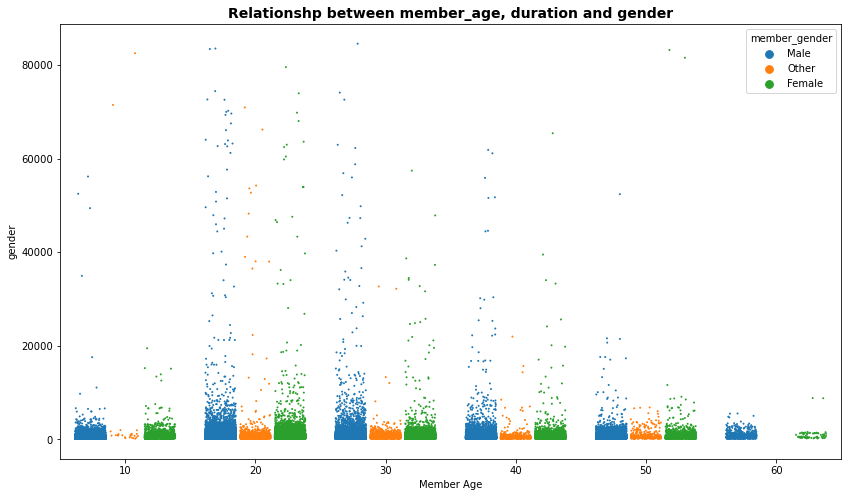

In [21]:
plt.figure(figsize = [14, 8])
# Create an interval in age (say 1o year)
df_gobike['member_age_intv'] = ((df_gobike['member_age']//10)*10).astype(int)

sb.stripplot(data = df_gobike, x = 'member_age_intv', y = 'duration_sec', hue = 'member_gender', size = 2, jitter = 0.35, dodge = True)
# Set the labels and titles
plt.title("Relationshp between member_age, duration and gender", fontsize = 14, weight = 'bold')
plt.xlabel('Member Age')
plt.ylabel('gender');

In [25]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 783575 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Rodri\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Rodri\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Rodri\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Rodri\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Rodri\anaconda3\lib\site-packages\